# k-Means Clustering from Scratch

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## KMeans Algorithm

Steps:
1. Select number of clusters
2. Choose each centroid starting position, preferrably randomly select k data points and use them as starting points
3. Calculate disances from each point to each centroid
4. Find closest centroid to the each data point and assign it to the cluster
5. Move centroids closer to the cluster's centers
6. Repeat until centroid doesn't move or until we reach maximum iterations

In [8]:
class KMeans:
    
    def __init__(self, k=2, max_iter=100):
        self.k = k
        self.max_iter = max_iter       
                
    def fit(self, data):
        self.data = data
        self.centroids = self.data[:self.k]

        for i in range(self.max_iter):
            
            self.classes = []
            
            for point in self.data:
                # Calculate distances between k-centroids and individual data point
                distances = [np.linalg.norm(point - centroid) for centroid in self.centroids]
                # Select centroid that is closest to the data point
                # and assign class to it (centroids have classes as their index: 0, 1, 2 ... n)
                self.classes.append(distances.index(min(distances)))

            for i in range(self.k):
                # Move centroids closer to the centers of their clusters
                self.centroids[i] = np.average([x for x, y in zip(self.data, self.classes) if y == i], axis=0)

In [9]:
data = make_blobs(n_samples=1000, n_features=2, centers=3)

In [10]:
model = KMeans(k=3)
model.fit(data[0])

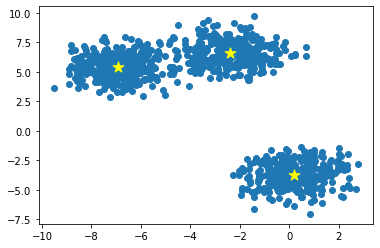

In [11]:
plt.scatter([i[0] for i in data[0]], [i[1] for i in data[0]])

for i in model.centroids:
    plt.scatter(i[0], i[1], marker='*', s=130, c='yellow')
plt.show()